# Module 1: Curve Fitting

This is a Jupyter Notebook started by James Toh for PHAS0056

In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the function


In [46]:
theta = [0,1]
sigma = 0.5
print(np.random.normal(scale=sigma))

-0.87166014204685


In [47]:
def polyModelWithNoise(x,theta,sigma):
    '''
    x is a numpy array of x values, "theta" are the parameters of the polynomial such that y(x)=∑iθixi and sigma is the standard deviation of the noise distribution that is added        to the polynomial function
    '''
    y = np.polynomial.polynomial.polyval(x,theta)
    noise = np.random.normal(scale=sigma, size=len(y))
    return y + noise

def true_f(x):
    return polyModelWithNoise(x,[0,1],0.5)

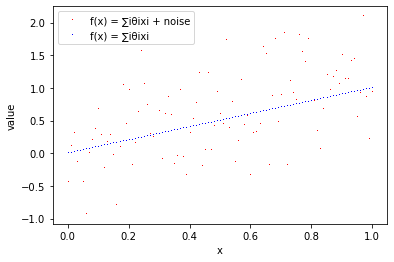

In [48]:
x = np.linspace(0,1,101) #generate x values
y = polyModelWithNoise(x,theta,sigma) #generate y plotting values, could have  used true_f instead here
y2 = theta[0] + theta[1]*x

plt.figure()
plt.plot(x,y,',',label='f(x) = ∑iθixi + noise',color='Red') #plot the values
plt.plot(x,y2,',',color='Blue',label='f(x) = ∑iθixi') #reference plot of the function
plt.ylabel('value')
plt.xlabel('x')
plt.legend(loc='Best')


In [57]:
def polyGradient(x,theta):
    '''
    returns gradient of polynomial function with respect to parameters theta
    '''
    grad = np.array([np.ones(len(x)), x])
    return grad

In [65]:
theta = [-1,0.5]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y

    #print(deviation)
    #print(polyGradient(x,theta))
    theta -= eta * np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)

Steps completed: 100
[0.12761012 0.95948157]


In [121]:
def true_f2(x):
    return polyModelWithNoise(x,[0,1,2,2],0.5)

def polyGradient3(x,theta):
    '''
    returns gradient of polynomial function with respect to parameters theta
    '''
    grad = np.array([np.ones(len(x)), x, x**2, x**3])
    return grad

def polyGradient7(x,theta):
    '''
    returns gradient of polynomial function with respect to parameters theta
    '''
    grad = np.array([np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6, x**7])
    return grad

In [122]:
theta = [-1,0.5]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y

    #print(deviation)
    #print(polyGradient(x,theta))
    theta -= eta * np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x".format(theta[0],theta[1]))
theta1 = theta

Steps completed: 100
[-0.74803628  4.58513814]
Polynomial: -0.7480 + 4.5851x


In [123]:
theta = [-1,0.5,1,1]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y

    #print(deviation)
    #print(polyGradient(x,theta))
    theta -= eta * np.average(deviation[None,:]*polyGradient3(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x +{2:.4f}x^2 + {3:.4f}x^3".format(theta[0],theta[1],theta[2],theta[3]))
theta3 = theta

Steps completed: 100
[-0.04951565  1.31178132  1.85730424  1.81967333]
Polynomial: -0.0495 + 1.3118x +1.8573x^2 + 1.8197x^3


In [124]:
theta = [-1,0.5,1,1,-1,-1,-1,0]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y

    #print(deviation)
    #print(polyGradient(x,theta))
    theta -= eta * np.average(deviation[None,:]*polyGradient7(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x +{2:.4f}x^2 + {3:.4f}x^3 + {4:.4f}x^4 + {5:.4f}x^5 + {6:.4f}x^6 + {7:.4f}x^7".format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7]))
theta7 = theta

Steps completed: 100
[-0.19904131  1.28228493  1.85283421  1.85678384 -0.18066054 -0.23384021
 -0.29042755  0.65479191]
Polynomial: -0.1990 + 1.2823x +1.8528x^2 + 1.8568x^3 + -0.1807x^4 + -0.2338x^5 + -0.2904x^6 + 0.6548x^7


Text(0, 0.5, 'f(x)')

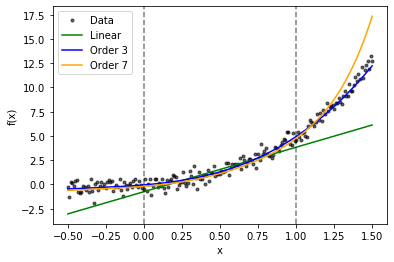

In [132]:
x = np.linspace(-0.5,1.5,201)
plt.figure()
plt.plot(x,true_f2(x),'.',label='Data',color='Black',alpha=0.6)
plt.plot(x,polyModelWithNoise(x,theta1,0),label='Linear',color='Green')
plt.plot(x,polyModelWithNoise(x,theta3,0),label='Order 3',color='Blue')
plt.plot(x,polyModelWithNoise(x,theta7,0),label='Order 7',color='Orange')
plt.axvline(0,ls='--',alpha=0.5,color='Black')
plt.axvline(1,ls='--',alpha=0.5,color='Black')
plt.legend(loc='Best')
plt.xlabel('x')
plt.ylabel('f(x)')

From the plot it can be seen that all three are reasonably good from within their training range. The linear fit is obviously limited in its ability to match the curve but both the third and seventh order polynomials can be seen to match well within that range. Outside the range, between x=1 and x=1.5 the seventh order polynomial departs the curve as expected, while the third order polynomial continues to be quite close, as expected as the data is based on a third order polynomial.